# Problem 1

**(a)** In the case of movie review, let  

$\theta$ = proportion of positive review  
$n$ = size of review for a random movie    
$y$ = number of positive review for a random movie  

Therefore sampling distribution:  
$$
\begin{aligned}
y\mid\theta \sim \operatorname{Bin}(n,\theta)
\end{aligned}
$$

Sampling density:  
$$
\begin{aligned}
{p}(y\mid\theta) = \binom{n}{y}\cdot \theta^y(1-\theta)^{n-y},  \quad y = 0,...,n
\end{aligned}
$$  

**For Movie_1: **

$y$ = 150 from $n$ = 200  

So the likelihood:  
$$
\begin{aligned}
 {p}(y=150\mid\theta) &= \binom{200}{150}\cdot \theta^{150}(1-\theta)^{200-150}  \\
 &\propto \theta^{150}(1-\theta)^{50}
\end{aligned}
$$  


Now assume a uniform prior on p: 
$$
\begin{aligned}
\theta \sim \operatorname{U}(0,1)
\end{aligned}
$$
so that 
$$
\begin{aligned}
{p}(\theta) = 1, \quad {0} <\theta < {1}
\end{aligned}
$$

Apply Bayes' rule, now the posterior density:
$$
\begin{aligned}
 {p}(\theta\mid{y=150}) &\propto{1}\cdot \theta^{150}(1-\theta)^{50} \\
 &\propto \theta^{150}(1-\theta)^{50} ,
 \quad {0} <\theta < {1}
\end{aligned}
$$

**therefore the posterior distribution of Movie_1 is: ** 
$$
\begin{aligned}
\theta\mid{y=150} \sim \operatorname{Beta}(\alpha = 151,\beta = 51)
\end{aligned}
$$

Similarily, **For Movie_2: **

$y$ = 4 from $n$ = 5  

**the posterior distribution of Movie_2 is: **
$$
\begin{aligned}
\theta\mid{y=4} \sim \operatorname{Beta}(\alpha = 5,\beta = 2)
\end{aligned}
$$


**(b)** 
The posterior mean for Movie_1: 
$$
\begin{aligned}
\operatorname{E}(\theta\mid{y=150}) = \frac{\alpha}{\alpha + \beta} = \frac{151}{151 + 51} \approx 0.748
\end{aligned}
$$

The posterior mean for Movie_2: 
$$
\begin{aligned}
\operatorname{E}(\theta\mid{y=4}) = \frac{\alpha}{\alpha + \beta} = \frac{5}{5 + 2} \approx 0.714
\end{aligned}
$$

The posterior mode for Movie_1: 
$$
\begin{aligned}
\operatorname{E}(\theta\mid{y=150}) = \frac{\alpha - 1}{\alpha + \beta - 2} = \frac{151-1}{151 + 51 - 2} = 0.75
\end{aligned}
$$

The posterior mode for Movie_2: 
$$
\begin{aligned}
\operatorname{E}(\theta\mid{y=4}) = \frac{\alpha - 1}{\alpha + \beta - 2} = \frac{5-1}{5 + 2 - 2} = 0.8
\end{aligned}
$$

Now use R function `qbeta` to simulate the distribution and find posterior median for   
Movie_1: 0.748  
Movie_2: 0.736  


In [2]:
posterior.samples <- qbeta(c(0.5), 151, 51) 
median(posterior.samples)

[1] 0.748343

In [5]:
posterior.samples <- qbeta(c(0.5), 5, 2) 
median(posterior.samples)

[1] 0.73555

**Conclusion: Movie_1 ranks higher according to posterior mean, Movie_2 ranks higher according to posterior mode, and Movie_1 ranks higher according to posterior median.**

# Problem 2

**(a)** load the randomwikipedia data:

In [2]:
wikidata <- read.table("randomwikipedia.txt", header=TRUE)

In [3]:
head(wikidata)

pageID,bytes
13143885,628
3042586,11433
3193309,4156
2807448,1713
39456694,7880
3096195,3398


**(a)(i)** a histogram of article length:  
This histogram is right skewed. As shown in the summary code block, the data has a median of 3912 bytes, mean of 6756 bytes.

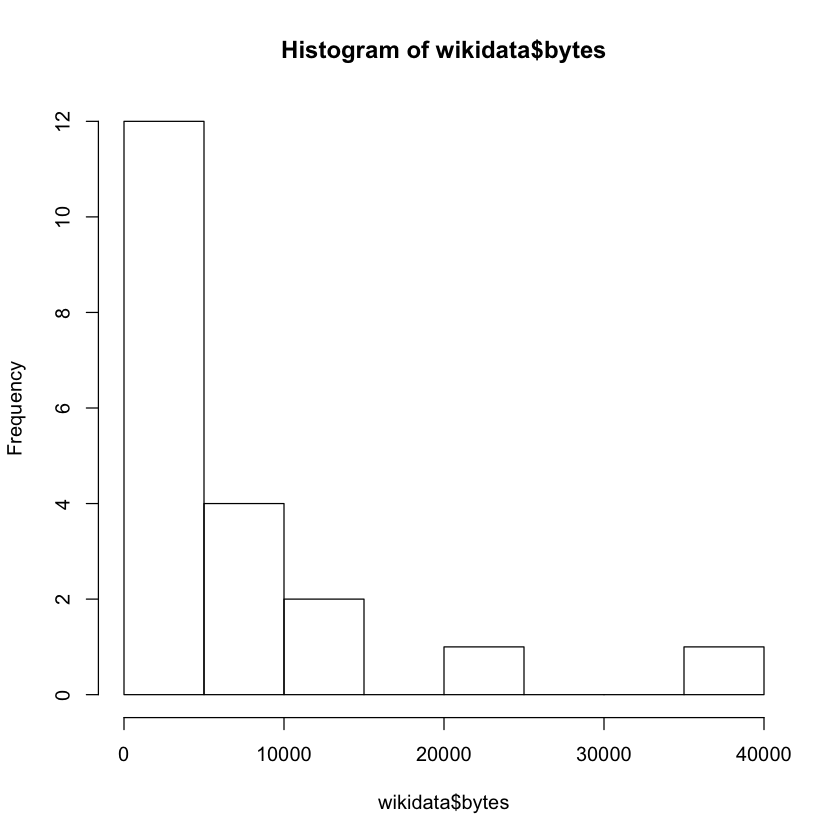

In [4]:
hist(wikidata$bytes)

In [5]:
summary(wikidata$bytes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    265    1322    3912    6756    7908   35151 

**(a)(ii)** a histogram of log transformed article length:
It is now less skewed and more looks like a normal distribution. 

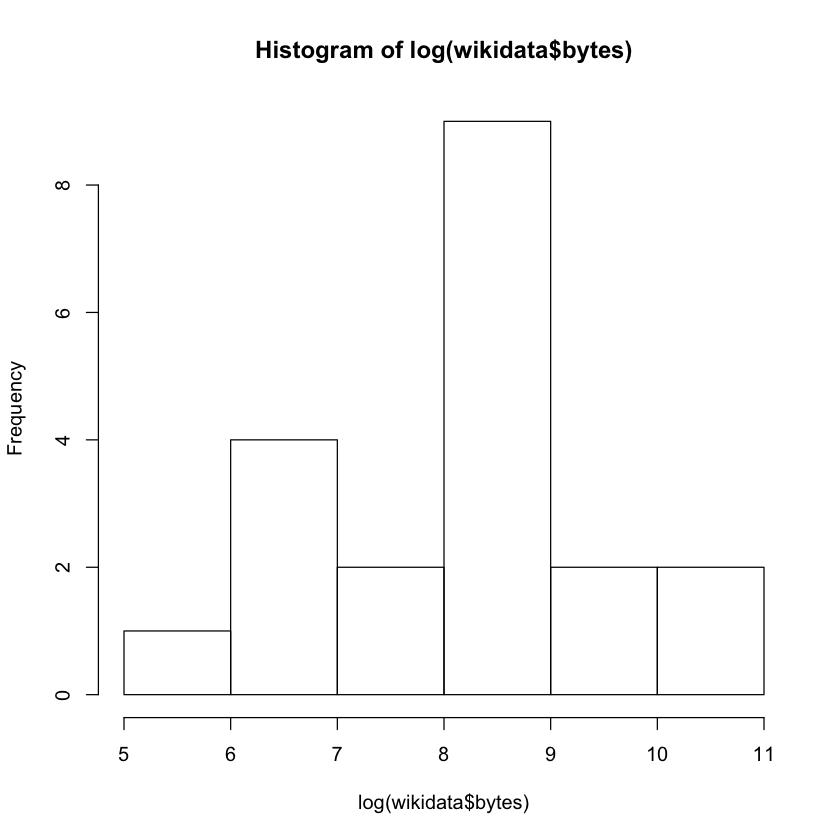

In [6]:
hist(log(wikidata$bytes))

In [7]:
summary(log(wikidata$bytes))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.580   7.181   8.270   8.160   8.976  10.467 

**(a)(iii)** I think log scale is better to use for the remainder of the analysis, because in part (b) it assumes each $y_i$ is normally distributed.

**(b)** Let $y_i$ be length of article $i$ on the log scale, sample mean:  
$$
\begin{aligned}
\overline{y} = \frac{1}{n}\sum_{i=1}^{n}y_i = 8.160
\end{aligned}
$$

sample standard deviation:  
$$
\begin{aligned}
s = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(y_i - \overline{y})^2} = 1.242
\end{aligned}
$$

In [8]:
mean(log(wikidata$bytes)) #sample mean deviation_log scale
sd(log(wikidata$bytes)) #sample standard deviation_log scale

[1] 8.1604

[1] 1.242427

**(c)** Now assume $y_i$ is normally distributed with unknown mean $\mu$, variance equal to the sample variance.

**(c)(i)** a conjugate prior for $\mu$ is also normally distributed:  
$$
\begin{aligned}
\mu \sim \operatorname{N}(\mu_0,\tau_0)
\end{aligned}
$$

$$
\begin{aligned}
{p}(\mu) \propto \operatorname{exp}(-\frac{1}{2\tau_0^2}(\mu - \mu_0)^2)
\end{aligned}
$$

so the posterior density of $\mu$ given $y$ is:  
$$
\begin{aligned}
{p}(\mu\mid y) &\propto  {p}(\mu){p}(y\mid\mu) \\
&\propto \operatorname{exp}(-\frac{1}{2\tau_n^2}(\mu - \mu_n)^2)
\end{aligned}
$$

where  
$$
\begin{aligned}
\mu_n = \frac{\frac{1}{\tau_0^2}\mu_0 + \frac{n}{\sigma^2}\overline{y}}{\frac{1}{\tau_0^2} + \frac{n}{\sigma^2}}
\quad \quad \frac{1}{\tau_n^2} = \frac{1}{\tau_0^2} + \frac{n}{\sigma^2}
\end{aligned}
$$

known that  
  
$\overline{y} = 8.160$  
$\mu_0 = 8.270$  
$\tau_0^2 = s^2 = 1.544$  

therefore:  
  
posterior mean: $\mu_n \approx 8.165$  
posterior variance: $\tau_n^2 \approx 0.074$  
posterior precision: $\frac{1}{\tau_n^2} \approx 13.601$


In [9]:
var(log(wikidata$bytes)) #sample variance_log scale

[1] 1.543624

In [10]:
mu_0 = 8.270
tau_0_sqrd = 1.544
n = nrow(wikidata)
y_bar = 8.160

mu_n = ((mu_0/tau_0_sqrd)+(y_bar*n/tau_0_sqrd))/((1/tau_0_sqrd)+n/tau_0_sqrd) 
mu_n #posterior mean

[1] 8.165238

In [11]:
tau_n_sqrd = 1/((1/tau_0_sqrd)+(n/tau_0_sqrd))
tau_n_sqrd #posterior variance

[1] 0.07352381

In [12]:
posterior.precision = (1/tau_0_sqrd)+(n/tau_0_sqrd)
posterior.precision

[1] 13.60104

**(c)(ii)**Plot the prior and posterior densities in a single plot.

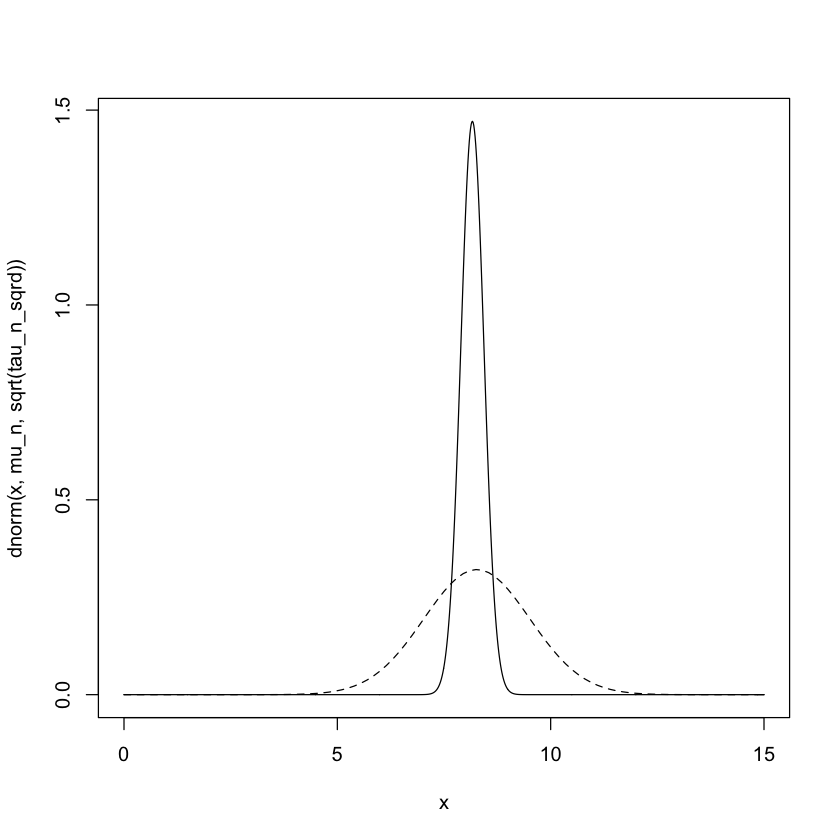

In [13]:
curve(dnorm(x,mu_n,sqrt(tau_n_sqrd)), 0, 15, n=1000)  # posterior
curve(dnorm(x,mu_0,sqrt(tau_0_sqrd)), 0, 15, add=TRUE, lty=2)  # conjugate prior

**(c)(iii)**a 90% central posterior interval for $\mu \approx (7.719, 8.611)$

In [14]:
qnorm(.05)
qnorm(.95)

[1] -1.644854

[1] 1.644854

In [15]:
#margin of error is
me <- 1.645*(sqrt(tau_n_sqrd))
mu_n - me 
mu_n + me

[1] 7.719192

[1] 8.611284

**(d)** Consider a flat prior for $\mu$, so the $\tau_0^2\to\infty$, therefore
$$
\begin{aligned}
\mu\mid y \longrightarrow \operatorname{N}(\overline{y},\frac{\sigma^2}{n})
\end{aligned}
$$

consider 
$$
\begin{aligned}
{p}(\mu) \propto 1 \quad \quad -\infty<\mu<\infty
\end{aligned}
$$

so that posterior density of $\mu$
$$
\begin{aligned}
{p}(\mu\mid y) &\propto  {p}(\mu){p}(y\mid\mu) \\
&\propto \operatorname{exp}(-\frac{n}{2\sigma^2}(\mu - \overline{y})^2) \quad \quad -\infty<\mu<\infty
\end{aligned}
$$

$n = 20$ therefore: 
posterior mean: $\mu_n = \overline{y} \approx 8.160$  
posterior variance: $\tau_n^2 = \sigma^2/n \approx 0.0772$  
posterior precision: $\frac{1}{\tau_n^2} \approx 12.953$



**(d)(ii)**Plot the prior and posterior densities in a single plot.

In [16]:
n=20
mu_n=y_bar
tau_n_sqrd=var(log(wikidata$bytes))/n

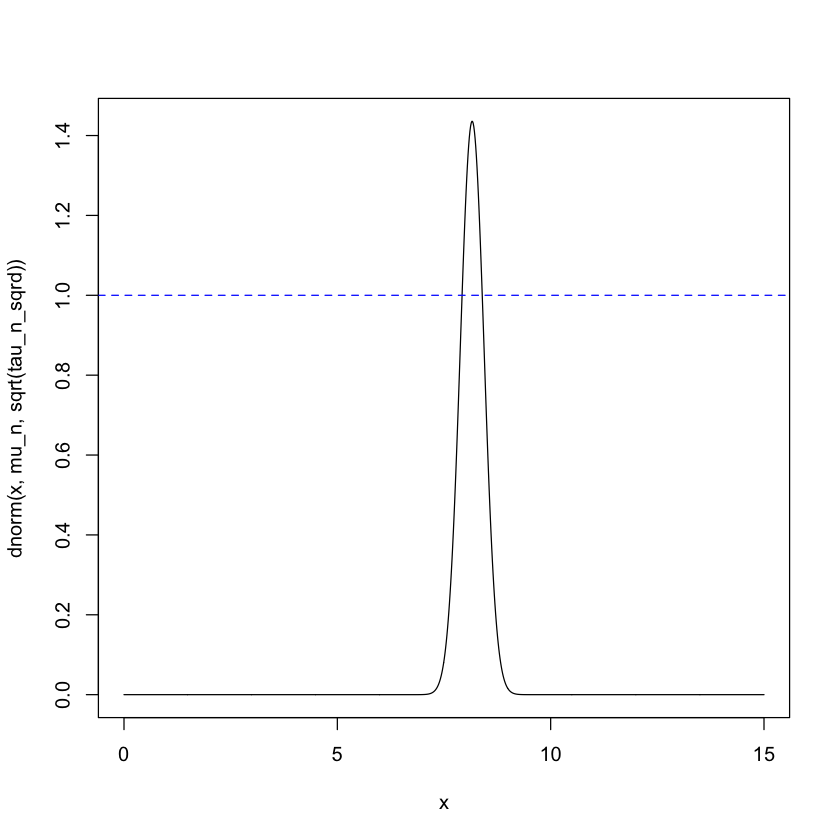

In [17]:
curve(dnorm(x,mu_n,sqrt(tau_n_sqrd)), 0, 15, n=1000)  # posterior
abline(h=1,col="blue", lty=2)  # flat prior

**(d)(iii)** A 90% central posterior interval for $\mu\approx (7.703, 8.617)$ 

In [18]:
qnorm(.05)
qnorm(.95)

[1] -1.644854

[1] 1.644854

In [19]:
#margin of error is
me <- 1.645*(sqrt(tau_n_sqrd))

#90% CI
mu_n - me 
mu_n + me

[1] 7.702994

[1] 8.617006

**(e)(i)** simulate 1000 samples from the posterior predictive distribution of article length (in bytes).  
The simulated sample mean is 3591.135.  
The simulated sample variance is 953417.724

In [20]:
post.mu.sim <- exp(rnorm(1000, mu_n, sqrt(tau_n_sqrd)))

In [21]:
mean(post.mu.sim)

[1] 3591.135

In [22]:
var(post.mu.sim)

[1] 953417.7

**(e)(ii)** 
Given that there are about 5.7 million articles on the English Wikipedia, estimate the total number of bytes that represents, based on the posterior predictive distribution: 43166141085.8314

In [65]:
sum(exp(rnorm(5700000, mu_n, sqrt(tau_n_sqrd))))

[1] 43166141086